In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor

In [3]:
train_data = pd.read_csv('./train.csv')

In [4]:
train_data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,539.0,25.0,0.50,0.25,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.498716,0.442789,35.697203,5830.89362
1,1,691.0,25.0,0.50,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.502842,0.443755,35.285926,6190.66597
2,2,775.0,25.0,0.50,0.38,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.385022,0.399556,30.052521,3923.90628
3,3,49.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.346411,0.388819,29.631796,3680.56025
4,4,556.0,25.0,0.50,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.403311,0.401670,30.806856,4576.10071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,714.0,25.0,0.50,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.509934,0.427938,35.874495,6422.92209
14996,14996,726.0,25.0,0.50,0.38,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.508342,0.459224,37.966864,6263.80788
14997,14997,145.0,12.5,0.25,0.25,0.38,0.38,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.483671,0.417909,35.557537,6521.29112
14998,14998,28.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.372318,0.395636,30.795613,4278.76321


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

### Collinearity

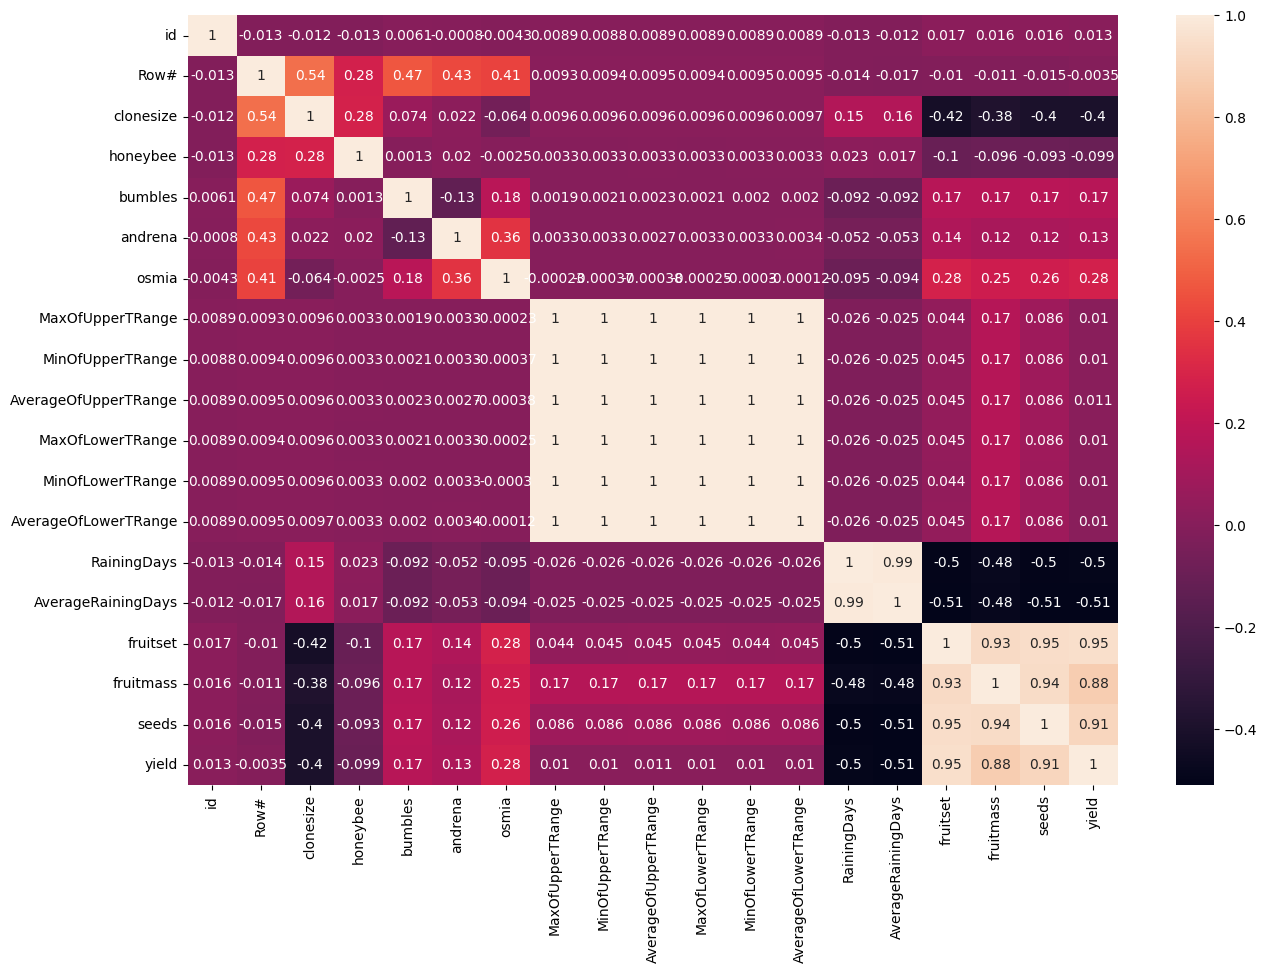

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(data=train_data.corr(), annot=True)
plt.show()

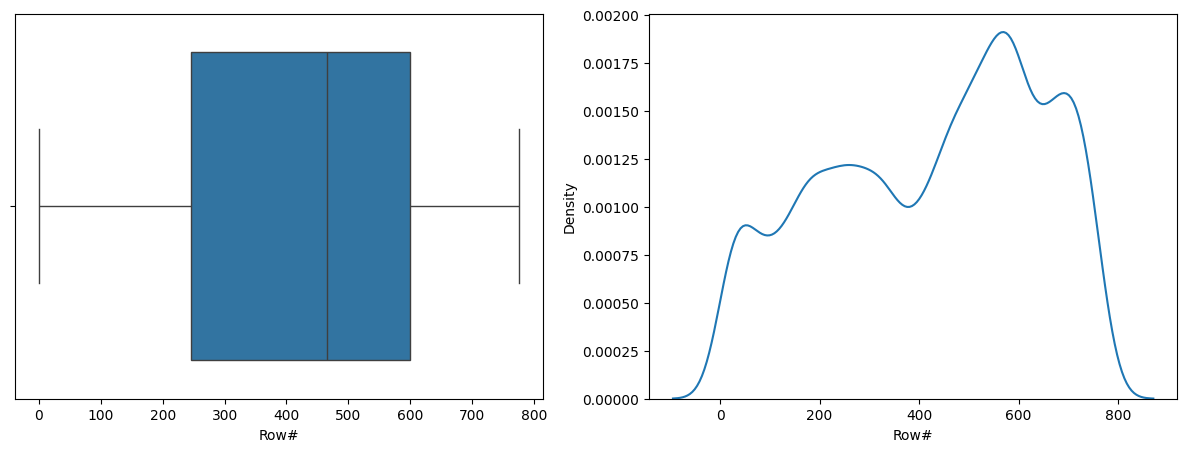

In [79]:
fig, ax = plt.subplots(1,ncols=2,figsize=(15,5))

sns.boxplot(data=train_data, x='Row#', ax=ax[0])
sns.kdeplot(train_data['Row#'], ax=ax[1])
plt.show()

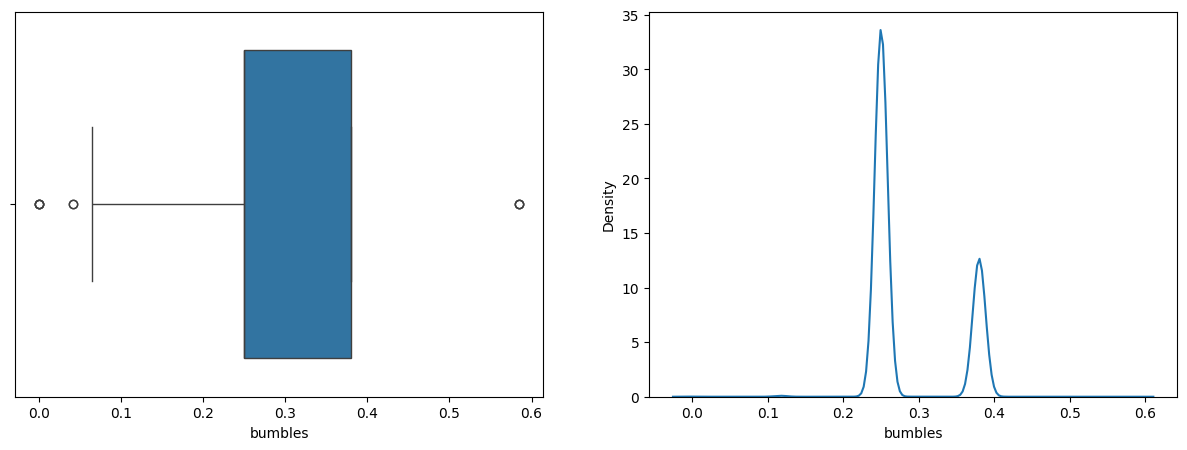

In [80]:
fig, ax = plt.subplots(1,ncols=2,figsize=(15,5))

sns.boxplot(data=train_data, x='bumbles', ax=ax[0])
sns.kdeplot(train_data['bumbles'], ax=ax[1])
plt.show()

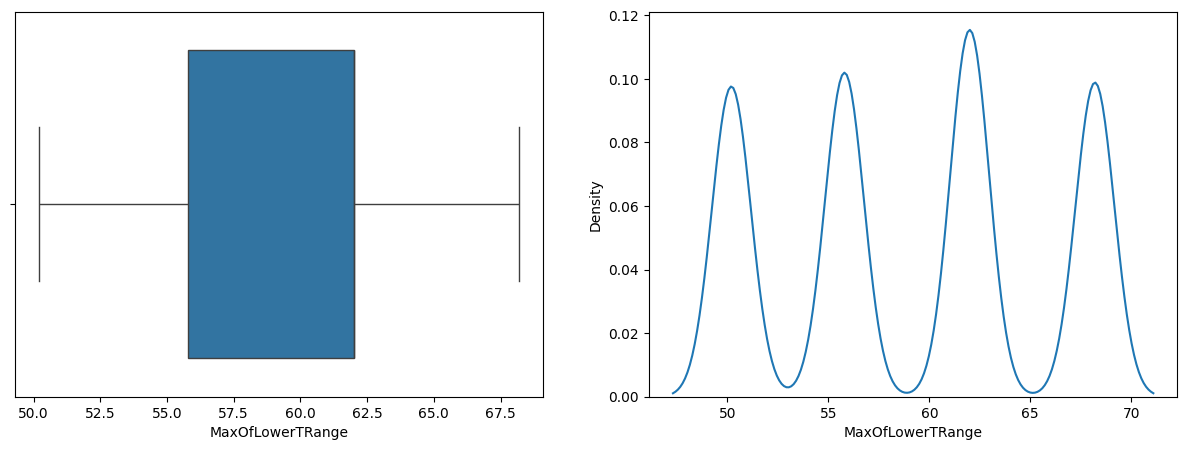

In [81]:
fig, ax = plt.subplots(1,ncols=2,figsize=(15,5))

sns.boxplot(data=train_data, x='MaxOfLowerTRange', ax=ax[0])
sns.kdeplot(train_data['MaxOfLowerTRange'], ax=ax[1])
plt.show()

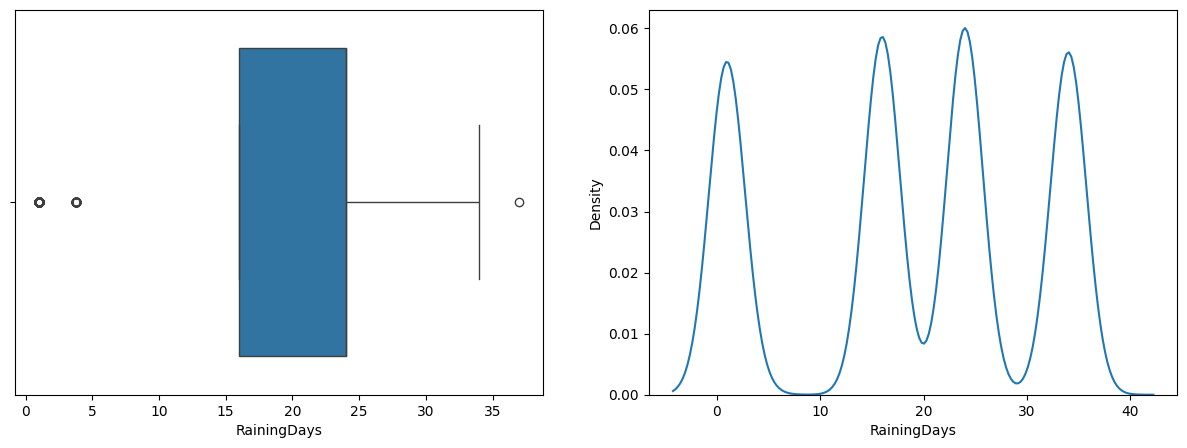

In [82]:
fig, ax = plt.subplots(1,ncols=2,figsize=(15,5))

sns.boxplot(data=train_data, x='RainingDays', ax=ax[0])
sns.kdeplot(train_data['RainingDays'], ax=ax[1])
plt.show()

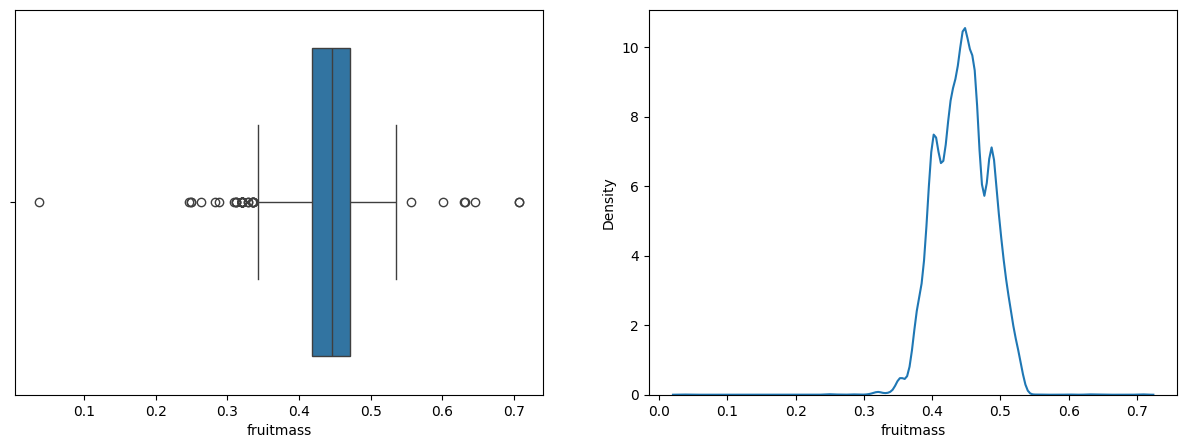

In [83]:
fig, ax = plt.subplots(1,ncols=2,figsize=(15,5))

sns.boxplot(data=train_data, x='fruitmass', ax=ax[0])
sns.kdeplot(train_data['fruitmass'], ax=ax[1])
plt.show()

### Get X and Y

In [4]:
X = train_data.drop(columns=['yield', 'id'])
Y = train_data['yield']

### Scaling X

In [38]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.52091838,  0.78263666,  0.28651724, ..., -0.01287313,
        -0.06796762, -0.08629734],
       [ 1.22551947,  0.78263666,  0.28651724, ...,  0.04056539,
        -0.0427427 , -0.18619462],
       [ 1.61490428,  0.78263666,  0.28651724, ..., -1.48523915,
        -1.19737807, -1.45736491],
       ...,
       [-1.3054818 , -1.0922715 , -0.35420178, ..., -0.20770274,
        -0.7179399 , -0.12022155],
       [-1.84783922,  0.78263666, -0.35420178, ..., -1.64975247,
        -1.29978513, -1.27687131],
       [-1.57434274, -1.0922715 , -0.35420178, ..., -0.21828691,
         0.00244065, -0.4598358 ]])

#### Split Data into train and Test

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Linear Model

In [40]:
li_model = LinearRegression()

li_model.fit(x_train, y_train)

LinearRegression()

#### Predictions

In [41]:
y_train_pred = li_model.predict(x_train)
y_test_pred = li_model.predict(x_test)

In [42]:
print('train mea:', mean_absolute_error(y_train, y_train_pred))
print('train mse:', mean_squared_error(y_train, y_train_pred))
print('train r2_score:', r2_score(y_train, y_train_pred))
print('\n')
print('test mea:', mean_absolute_error(y_test, y_test_pred))
print('test mse:', mean_squared_error(y_test, y_test_pred))
print('test r2_score:', r2_score(y_test, y_test_pred))

train mea: 276.92867952614
train mse: 172501.35492847805
train r2_score: 0.9069155986011894


test mea: 282.4054348953499
test mse: 216844.1948908802
test r2_score: 0.8845443620156535


In [46]:
prediction = li_model.predict(test_X)

In [47]:
prediction_csv = pd.DataFrame({
    'id': test_data['id'],
    'prediction': prediction
})

In [48]:
prediction_csv.to_csv('prediction.csv', index=False)

### Linear Model Assumptions

#### Linearity

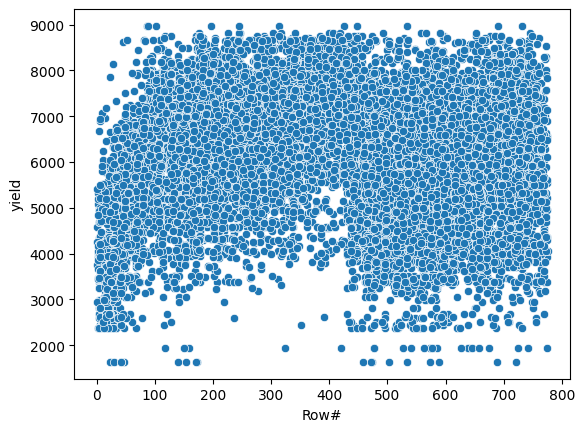

In [40]:
sns.scatterplot(data=train_data, x='Row#', y='yield')
plt.show()

NO LINEARITY

In [10]:
residuals = y_test - y_test_pred

#### Normality of Residuals

- No normality

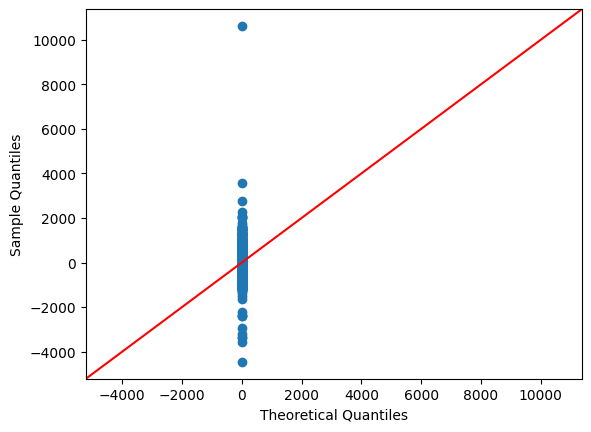

In [11]:
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.show()

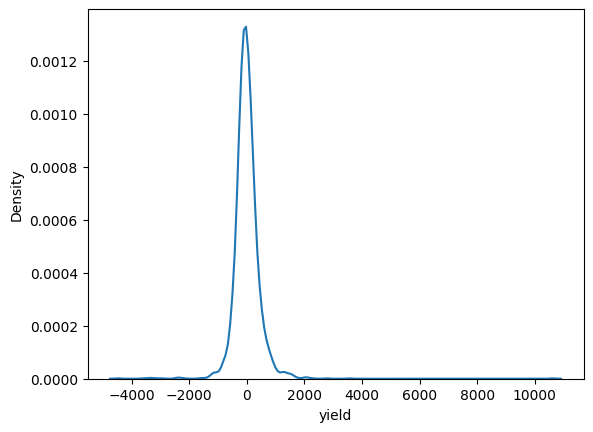

In [44]:
sns.kdeplot(residuals)
plt.show()

##### Independence of Residuals

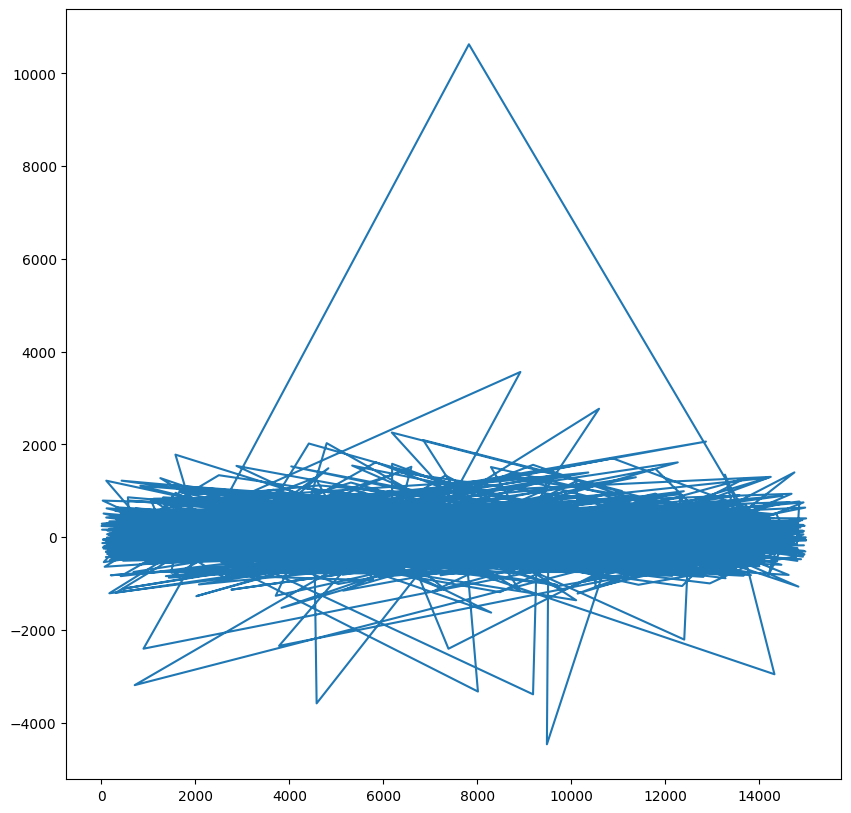

In [45]:
plt.figure(figsize=(10,10))

plt.plot(residuals)
plt.show()

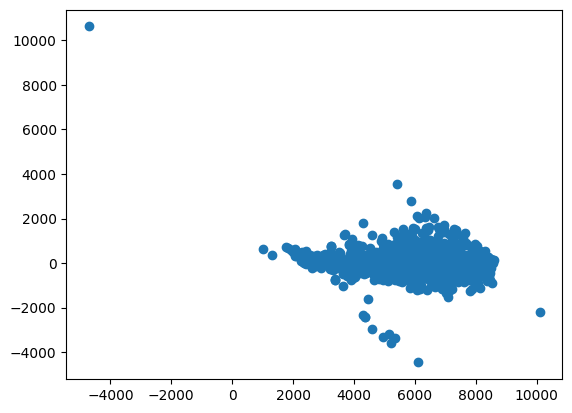

In [46]:
plt.scatter(y_test_pred, residuals)
plt.show()

#### Heteroscedasticity

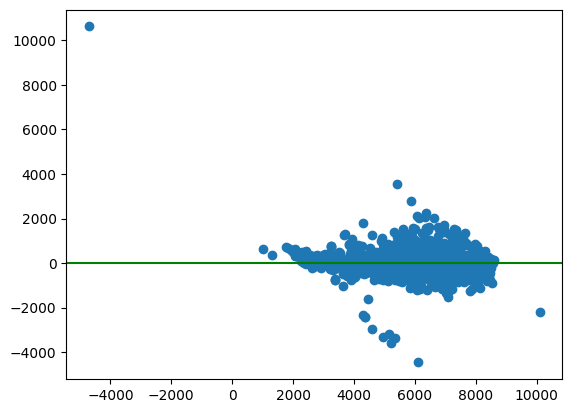

In [47]:
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='green')
plt.show()

### Transformation

In [50]:
degree = 4
poly = PolynomialFeatures(degree)
xtrain_poly = poly.fit_transform(x_train)
xtest_poly = poly.fit_transform(x_test)

Regression

In [51]:
poly_model = LinearRegression()
poly_model.fit(xtrain_poly, y_train)

LinearRegression()

In [52]:
ytrain_poly_pred = poly_model.predict(xtrain_poly)
ytest_poly_pred = poly_model.predict(xtest_poly)

In [53]:
print('train mea:', mean_absolute_error(y_train, ytrain_poly_pred))
print('train mse:', mean_squared_error(y_train, ytrain_poly_pred))
print('train r2_score:', r2_score(y_train, ytrain_poly_pred))
print('\n')
print('test mea:', mean_absolute_error(y_test, ytest_poly_pred))
print('test mse:', mean_squared_error(y_test, ytest_poly_pred))
print('test r2_score:', r2_score(y_test, ytest_poly_pred))

train mea: 237.9990407154581
train mse: 119949.72004255021
train r2_score: 0.9352732742722799


test mea: 17985828994.347416
test mse: 9.692277771983612e+23
test r2_score: -5.1605168136918925e+17


### Regularization

#### Ridge

In [15]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [16]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    degree = 4
    ridge_poly = PolynomialFeatures(degree)

    xtrain_ridge = ridge_poly.fit_transform(x_train)
    xtest_ridge = ridge_poly.fit_transform(x_test)

    ridge_model = Ridge(alpha=i)

    ridge_model.fit(xtrain_ridge, y_train)

    ytrain_ridge_pred = ridge_model.predict(xtrain_ridge)
    ytest_ridge_pred = ridge_model.predict(xtest_ridge)

    print('train mse:', mean_squared_error(y_train, ytrain_ridge_pred))
    print('train r2_score:', r2_score(y_train, ytrain_ridge_pred))
    print('test mse:', mean_squared_error(y_test, ytest_ridge_pred))
    print('test r2_score:', r2_score(y_test, ytest_ridge_pred))
    

train mse: 135396.8588265495
train r2_score: 0.926937759066448
test mse: 5.99748802348374e+29
test r2_score: -3.1932780418827564e+23
train mse: 139882.6830236331
train r2_score: 0.9245171388902242
test mse: 370996.2812589041
test r2_score: 0.802468254388265
train mse: 144058.72595606899
train r2_score: 0.9222636814797436
test mse: 180320.5443868211
test r2_score: 0.9039908654029608
train mse: 148017.8073426473
train r2_score: 0.9201272998779202
test mse: 167572.86909619704
test r2_score: 0.9107781855995514
train mse: 152887.7022332433
train r2_score: 0.9174994292101553
test mse: 167051.2354669472
test r2_score: 0.911055922079836
train mse: 162772.61564116328
train r2_score: 0.9121653769191642
test mse: 173125.95233655366
test r2_score: 0.9078215246263666
train mse: 184145.51697979576
train r2_score: 0.900632228509476
test mse: 191703.6256901405
test r2_score: 0.8979301040587904
train mse: 244714.95725930706
train r2_score: 0.8679480209343126
test mse: 246242.87818221116
test r2_score: 

In [54]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=lambdas, cv=3)
ridge_cv.fit(xtrain_poly, y_train)

ytrain_ridgecv_pred = ridge_cv.predict(xtrain_poly)
ytest_ridgecv_pred = ridge_cv.predict(xtest_poly)

print('Optimal alpha:', ridge_cv.alpha_)
print('train mse:', mean_squared_error(y_train, ytrain_ridgecv_pred))
print('test mse:', mean_squared_error(y_test, ytest_ridgecv_pred))
print('train mae:', mean_absolute_error(y_train, ytrain_ridgecv_pred))
print('test mae:', mean_absolute_error(y_test, ytest_ridgecv_pred))
print('train r2_score:', r2_score(y_train, ytrain_ridgecv_pred))
print('test r2_score:', r2_score(y_test, ytest_ridgecv_pred))


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07605e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.92343e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.73823e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05261e-17): result may not be accurat

Optimal alpha: 1000.0
train mse: 147109.98461351392
test mse: 387706975.93969977
train mae: 262.00240817675353
test mae: 659.9834630593015
train r2_score: 0.9206171750754376
test r2_score: -205.42911967565118


#### Lasso

In [55]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=lambdas, cv=3)

lasso_cv.fit(xtrain_poly, y_train)

ytrain_lassocv_pred = lasso_cv.predict(xtrain_poly)
ytest_lassocv_pred = lasso_cv.predict(xtest_poly)

print('Optimal alpha:', ridge_cv.alpha_)
print('train mse:', mean_squared_error(y_train, ytrain_lassocv_pred))
print('test mse:', mean_squared_error(y_test, ytest_lassocv_pred))
print('train mae:', mean_absolute_error(y_train, ytrain_lassocv_pred))
print('test mae:', mean_absolute_error(y_test, ytest_lassocv_pred))
print('train r2_score:', r2_score(y_train, ytrain_lassocv_pred))
print('test r2_score:', r2_score(y_test, ytest_lassocv_pred))

c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139985095.2381868, tolerance: 1487999.089132215
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727170059.4375479, tolerance: 1487999.089132215
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614294841.3151343, tolerance: 1487999.089132215
  model = cd_fast.enet_coordinate

Optimal alpha: 1000.0
train mse: 196779.22065945086
test mse: 200823.58196245023
train mae: 305.26615882902394
test mae: 305.9465056160651
train r2_score: 0.8938148864372457
test r2_score: 0.8930743117682071


In [ ]:
from sklearn.linear_model import Lasso

lasso_final = Lasso(alpha=1.0)

lasso_final.fit()

In [35]:
from sklearn.linear_model import LassoCV

deep_lambdas=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]

lasso_cv = LassoCV(alphas=deep_lambdas, cv=3)

lasso_cv.fit(xtrain_poly, y_train)

ytrain_lassocv_pred = lasso_cv.predict(xtrain_poly)
ytest_lassocv_pred = lasso_cv.predict(xtest_poly)

print('Optimal alpha:', ridge_cv.alpha_)
print('train mse:', mean_squared_error(y_train, ytrain_lassocv_pred))
print('test mse:', mean_squared_error(y_test, ytest_lassocv_pred))
print('train mae:', mean_absolute_error(y_train, ytrain_lassocv_pred))
print('test mae:', mean_absolute_error(y_test, ytest_lassocv_pred))
print('train r2_score:', r2_score(y_train, ytrain_lassocv_pred))
print('test r2_score:', r2_score(y_test, ytest_lassocv_pred))

Optimal alpha: 1.0
train mse: 169219.48325672542
test mse: 176442.96061644578
train mae: 273.33339315838276
test mae: 275.65865273975555
train r2_score: 0.9086865473578498
test r2_score: 0.9060554302776245


In [24]:
test_model = LassoCV(alphas=[1.0], cv=3)

test_model.fit(xtrain_poly, y_train)

ytrain_lassocv_pred = lasso_cv.predict(xtrain_poly)
ytest_lassocv_pred = lasso_cv.predict(xtest_poly)

print('Optimal alpha:', ridge_cv.alpha_)
print('train mse:', mean_squared_error(y_train, ytrain_lassocv_pred))
print('test mse:', mean_squared_error(y_test, ytest_lassocv_pred))
print('train mae:', mean_absolute_error(y_train, ytrain_lassocv_pred))
print('test mae:', mean_absolute_error(y_test, ytest_lassocv_pred))
print('train r2_score:', r2_score(y_train, ytrain_lassocv_pred))
print('test r2_score:', r2_score(y_test, ytest_lassocv_pred))

Optimal alpha: 1.0
train mse: 157206.75649122993
test mse: 164302.49634065336
train mae: 264.11726567612396
test mae: 266.63740652754353
train r2_score: 0.9151688006746266
test r2_score: 0.9125194495200725


In [18]:
degree = 4
lasso_poly = PolynomialFeatures(degree)

xtrain_lasso = lasso_poly.fit_transform(x_train)
xtest_lasso = lasso_poly.fit_transform(x_test)

for i in lambdas:
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(xtrain_lasso, y_train)

    ytrain_lasso_pred = lasso_model.predict(xtrain_lasso)
    ytest_lasso_pred = lasso_model.predict(xtest_lasso)

    print('train mse:', mean_squared_error(y_train, ytrain_lasso_pred))
    print('train r2_score:', r2_score(y_train, ytrain_lasso_pred))
    print('test mse:', mean_squared_error(y_test, ytest_lasso_pred))
    print('test r2_score:', r2_score(y_test, ytest_lasso_pred))

c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.870e+08, tolerance: 2.224e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

train mse: 147825.21443572963
train r2_score: 0.9202312259917848
test mse: 180590.01738324325
test r2_score: 0.9038473883007164


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.470e+08, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train mse: 148751.51784593248
train r2_score: 0.9197313783326857
test mse: 172354.71942584892
test r2_score: 0.9082321567292215


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.636e+08, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train mse: 151349.29362228792
train r2_score: 0.9183295783108213
test mse: 164499.0096056621
test r2_score: 0.912414818799405


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e+08, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train mse: 157206.75649122993
train r2_score: 0.9151688006746266
test mse: 164302.49634065336
test r2_score: 0.9125194495200725
train mse: 170638.34657905906
train r2_score: 0.9079209067454562
test mse: 177128.09231976722
test r2_score: 0.9056906415501693
train mse: 185888.96762875008
train r2_score: 0.8996914355511043
test mse: 188010.81843300292
test r2_score: 0.8998962872809909
train mse: 646161.3702345074
train r2_score: 0.6513213221991648
test mse: 669702.672092041
test r2_score: 0.6434262429523765
train mse: 1853171.44802182
train r2_score: 0.0
test mse: 1879150.4632460333
test r2_score: -0.00052720208548096


#### Huber

In [ ]:
from sklearn.linear_model import Huber

In [22]:
degree = 4
huber_poly = PolynomialFeatures(degree)

xtrain_huber = huber_poly.fit_transform(x_train)
xtest_huber = huber_poly.fit_transform(x_test)
for i in lambdas:

    huber_model = HuberRegressor(alpha=i)

    huber_model.fit(xtrain_huber, y_train)

    ytrain_huber_pred = huber_model.predict(xtrain_huber)
    ytest_huber_pred = huber_model.predict(xtest_huber)

    print('train mse:', mean_squared_error(y_train, ytrain_huber_pred))
    print('test mse:', mean_squared_error(y_test, ytest_huber_pred))
    print('train r2_score:', r2_score(y_train, ytrain_huber_pred))
    print('test r2_score:', r2_score(y_test, ytest_huber_pred))

c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


train mse: 182987.95034691037
test mse: 190349.6959563315
train r2_score: 0.9012568693834334
test r2_score: 0.8986509848796098


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


train mse: 184921.51556290014
test mse: 191724.67989888525
train r2_score: 0.9002134876617618
test r2_score: 0.8979188940418281


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


train mse: 182442.4424522149
test mse: 189574.28026140324
train r2_score: 0.9015512338877418
test r2_score: 0.899063844047023


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


train mse: 185874.7674203121
test mse: 192727.14857544986
train r2_score: 0.8996990982033932
test r2_score: 0.8973851437116874


c:\Users\user\Desktop\code\python\Content\ML\Real-Estate\env\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


train mse: 207669.8415850516
test mse: 210469.45114359044
train r2_score: 0.8879381388016041
test r2_score: 0.8879385045551871
train mse: 357354.1353255759
test mse: 352748.8786967694
train r2_score: 0.807166176822422
test r2_score: 0.8121838269237835
train mse: 923329.0873030637
test mse: 913494.7695175996
train r2_score: 0.5017573315795053
test r2_score: 0.5136225737419834
train mse: 1642934.8778407157
test mse: 1664859.3039155414
train r2_score: 0.11344690768116616
test r2_score: 0.11356910806641107


# Best Model: Lasso with Lambda = 1.0

In [23]:
test_data = pd.read_csv('./test.csv')

In [25]:
test_data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,758.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.551264,0.479011,39.337772
1,15001,12.0,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.387861,0.395894,30.057704
2,15002,97.0,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.496618,0.444147,35.557537
3,15003,585.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.483873,0.445494,35.118739
4,15004,295.0,12.5,0.25,0.25,0.63,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.561190,0.477182,40.641638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,731.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.482854,0.442557,35.184412
9996,24996,749.0,25.0,0.50,0.38,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.572046,0.482875,40.402916
9997,24997,134.0,12.5,0.25,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.529678,0.457829,36.624966
9998,24998,425.0,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.564982,0.472670,39.589169


#### Scaling the test

In [44]:
test_X = scaler.fit_transform(test_data.drop(columns=['id']))

#### Transforming the Test

In [29]:
poly_test_X = poly.fit_transform(test_X)

In [30]:
test_pred = test_model.predict(poly_test_X)

In [34]:
submission_csv = pd.DataFrame({
    'id': test_data['id'],
    'prediction': test_pred
})

In [37]:
submission_csv.to_csv('submission_csv.csv', index=False)